In [ ]:
# Import all the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset
data = pd.read_csv('/content/Automobile_data.csv')

In [ ]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [ ]:
# Lets check the dimension of the dataset
data.shape

(205, 26)

In [ ]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

**Missing Value Detection and Treatment**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
data.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In this dataset there is no null value. But in the column "normalized-losses", we can see that there are "?" symbols. Now let's fix it.


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [ ]:
data["price"].head(50)

0     13495
1     16500
2     16500
3     13950
4     17450
5     15250
6     17710
7     18920
8     23875
9         ?
10    16430
11    16925
12    20970
13    21105
14    24565
15    30760
16    41315
17    36880
18     5151
19     6295
20     6575
21     5572
22     6377
23     7957
24     6229
25     6692
26     7609
27     8558
28     8921
29    12964
30     6479
31     6855
32     5399
33     6529
34     7129
35     7295
36     7295
37     7895
38     9095
39     8845
40    10295
41    12945
42    10345
43     6785
44        ?
45        ?
46    11048
47    32250
48    35550
49    36000
Name: price, dtype: object

After detailed checking, we can see that the "price" column also contains "?" symbols.

In [ ]:
# For fixing missing values in "normalized-losses"
from numpy import nan
data['normalized-losses'] = data['normalized-losses'].replace("?",np.nan)

In [ ]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


The "?" symbol in normalized-losses are replaced as NaN.

In [ ]:
data['price'] = data['price'].replace("?",np.nan)

In [ ]:
data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,NaN


In [ ]:
# Let's check the median
data.median()

<ipython-input-15-af7fbd9d1921>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


symboling                1.0
normalized-losses      115.0
wheel-base              97.0
length                 173.2
width                   65.5
height                  54.1
curb-weight           2414.0
engine-size            120.0
compression-ratio        9.0
city-mpg                24.0
highway-mpg             30.0
price                10295.0
dtype: float64

In [ ]:
# impute missing values with their respective columns median
data.fillna(data.median(), inplace=True)

<ipython-input-16-5b85c2c9ac43>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [ ]:
data.head(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,115.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,115.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,10295.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Here we can see that "normalized-losses" and "price" are stored in "object type". Now let's change that into Float to

In [ ]:
data['normalized-losses'] = pd.to_numeric(data['normalized-losses'], downcast= "float")
data['price'] = pd.to_numeric(data['price'],downcast = "float")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float32
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Now that we have treated the missing values lets move to outlier detection and treatment.

**Outlier Detection and Treatment**

Boxplots are a great way of detecting outliers.
Once the outliers have been detected, they can be imputed with the 5th and 95th percentiles.

In [ ]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

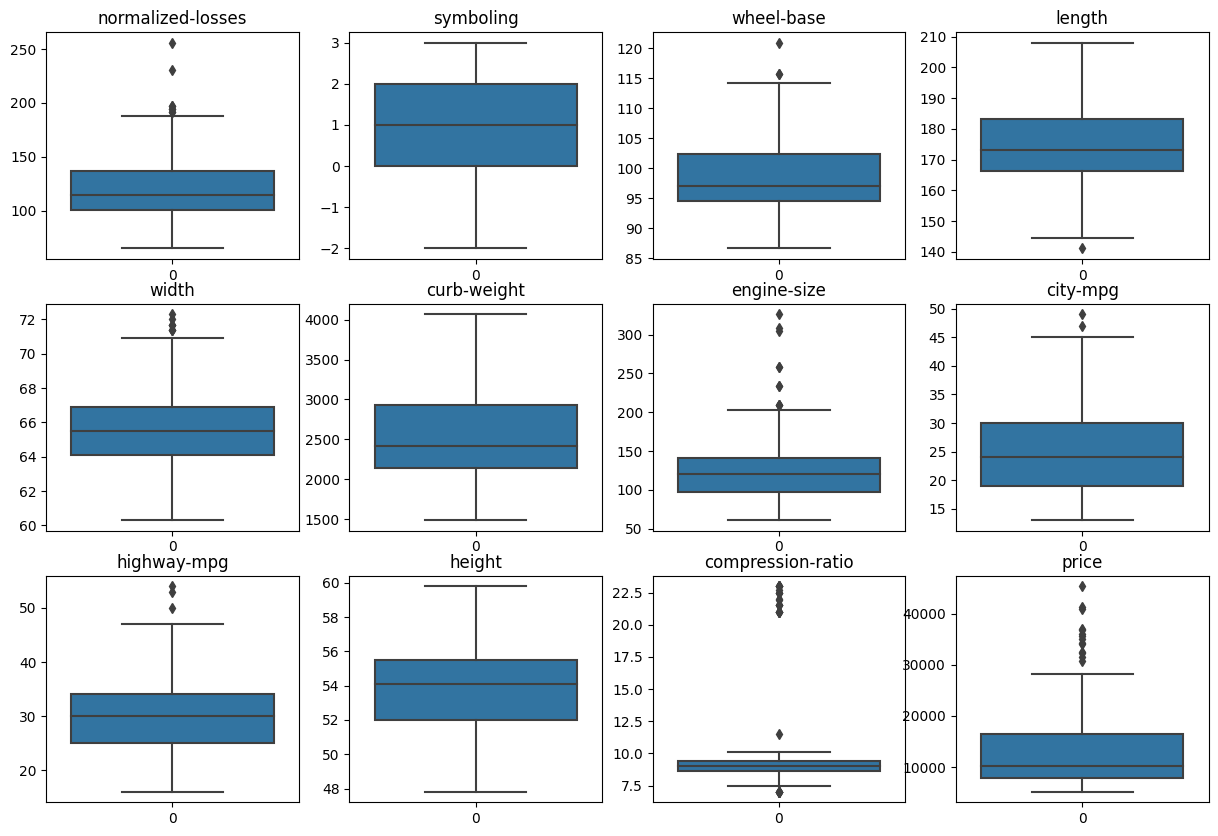

In [ ]:
# Outlier detection using boxplots
plt.figure(figsize = (15,10))

a1 = plt.subplot(3,4,1)
sns.boxplot(data['normalized-losses'])
a1.title.set_text('normalized-losses')

a2 = plt.subplot(3,4,2)
sns.boxplot(data['symboling'])
a2.title.set_text('symboling')

a3 = plt.subplot(3,4,3)
sns.boxplot(data['wheel-base'])
a3.title.set_text('wheel-base')

a4 = plt.subplot(3,4,4)
sns.boxplot(data['length'])
a4.title.set_text('length')

a5 = plt.subplot(3,4,5)
sns.boxplot(data['width'])
a5.title.set_text('width')

a6 = plt.subplot(3,4,6)
sns.boxplot(data['curb-weight'])
a6.title.set_text('curb-weight')

a7 = plt.subplot(3,4,7)
sns.boxplot(data['engine-size'])
a7.title.set_text('engine-size')

a8 = plt.subplot(3,4,8)
sns.boxplot(data['city-mpg'])
a8.title.set_text('city-mpg')

a9 = plt.subplot(3,4,9)
sns.boxplot(data['highway-mpg'])
a9.title.set_text('highway-mpg')

a10 = plt.subplot(3,4,10)
sns.boxplot(data['height'])
a10.title.set_text('height')

a11 = plt.subplot(3,4,11)
sns.boxplot(data['compression-ratio'])
a11.title.set_text('compression-ratio')

a12 = plt.subplot(3,4,12)
sns.boxplot(data['price'])
a12.title.set_text('price')


The twelve boxplots, nine of them have outliers. Let's imput these outliers  with the 5th and 95th percentiles.

In [ ]:
data['normalized-losses']=data['normalized-losses'].clip(lower=data['normalized-losses'].quantile(0.02),upper=data['normalized-losses'].quantile(0.95))

In [ ]:

data['wheel-base'] = data['wheel-base'].clip(lower = data['wheel-base'].quantile(0.5), upper = data['wheel-base'].quantile(0.95))
data['length'] = data['length'].clip(lower = data['length'].quantile(0.5), upper = data['length'].quantile(0.95))
data['width'] = data['width'].clip(lower = data['width'].quantile(0.2), upper = data['width'].quantile(0.95))
data['engine-size'] = data['engine-size'].clip(lower = data['engine-size'].quantile(0.2), upper = data['engine-size'].quantile(0.95))
data['city-mpg'] = data['city-mpg'].clip(lower = data['city-mpg'].quantile(0.5), upper = data['city-mpg'].quantile(0.95))
data['highway-mpg'] = data['highway-mpg'].clip(lower = data['highway-mpg'].quantile(0.2), upper = data['highway-mpg'].quantile(0.98))
data['compression-ratio'] = data['compression-ratio'].clip(lower = data['compression-ratio'].quantile(0.5), upper = data['compression-ratio'].quantile(0.85))
data['price'] = data['price'].clip(lower = data['price'].quantile(0.2), upper = data['price'].quantile(0.92))

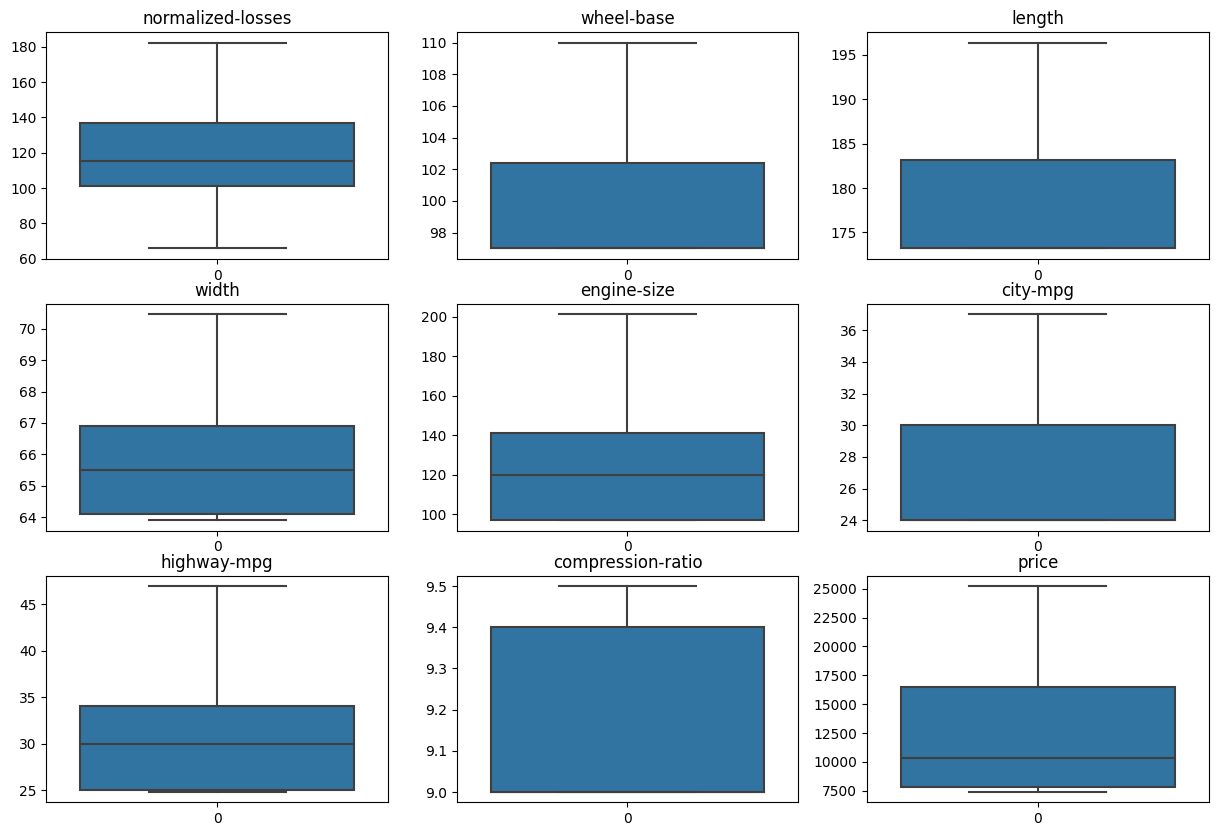

In [ ]:
# Outlier detection using boxplots
plt.figure(figsize = (15,10))

a1 = plt.subplot(3,3,1)
sns.boxplot(data['normalized-losses'])
a1.title.set_text('normalized-losses')


a3 = plt.subplot(3,3,2)
sns.boxplot(data['wheel-base'])
a3.title.set_text('wheel-base')

a4 = plt.subplot(3,3,3)
sns.boxplot(data['length'])
a4.title.set_text('length')

a5 = plt.subplot(3,3,4)
sns.boxplot(data['width'])
a5.title.set_text('width')


a7 = plt.subplot(3,3,5)
sns.boxplot(data['engine-size'])
a7.title.set_text('engine-size')

a8 = plt.subplot(3,3,6)
sns.boxplot(data['city-mpg'])
a8.title.set_text('city-mpg')

a9 = plt.subplot(3,3,7)
sns.boxplot(data['highway-mpg'])
a9.title.set_text('highway-mpg')


a11 = plt.subplot(3,3,8)
sns.boxplot(data['compression-ratio'])
a11.title.set_text('compression-ratio')

a12 = plt.subplot(3,3,9)
sns.boxplot(data['price'])
a12.title.set_text('price')




All the outliers are cleaned now. Let's move to visualization.

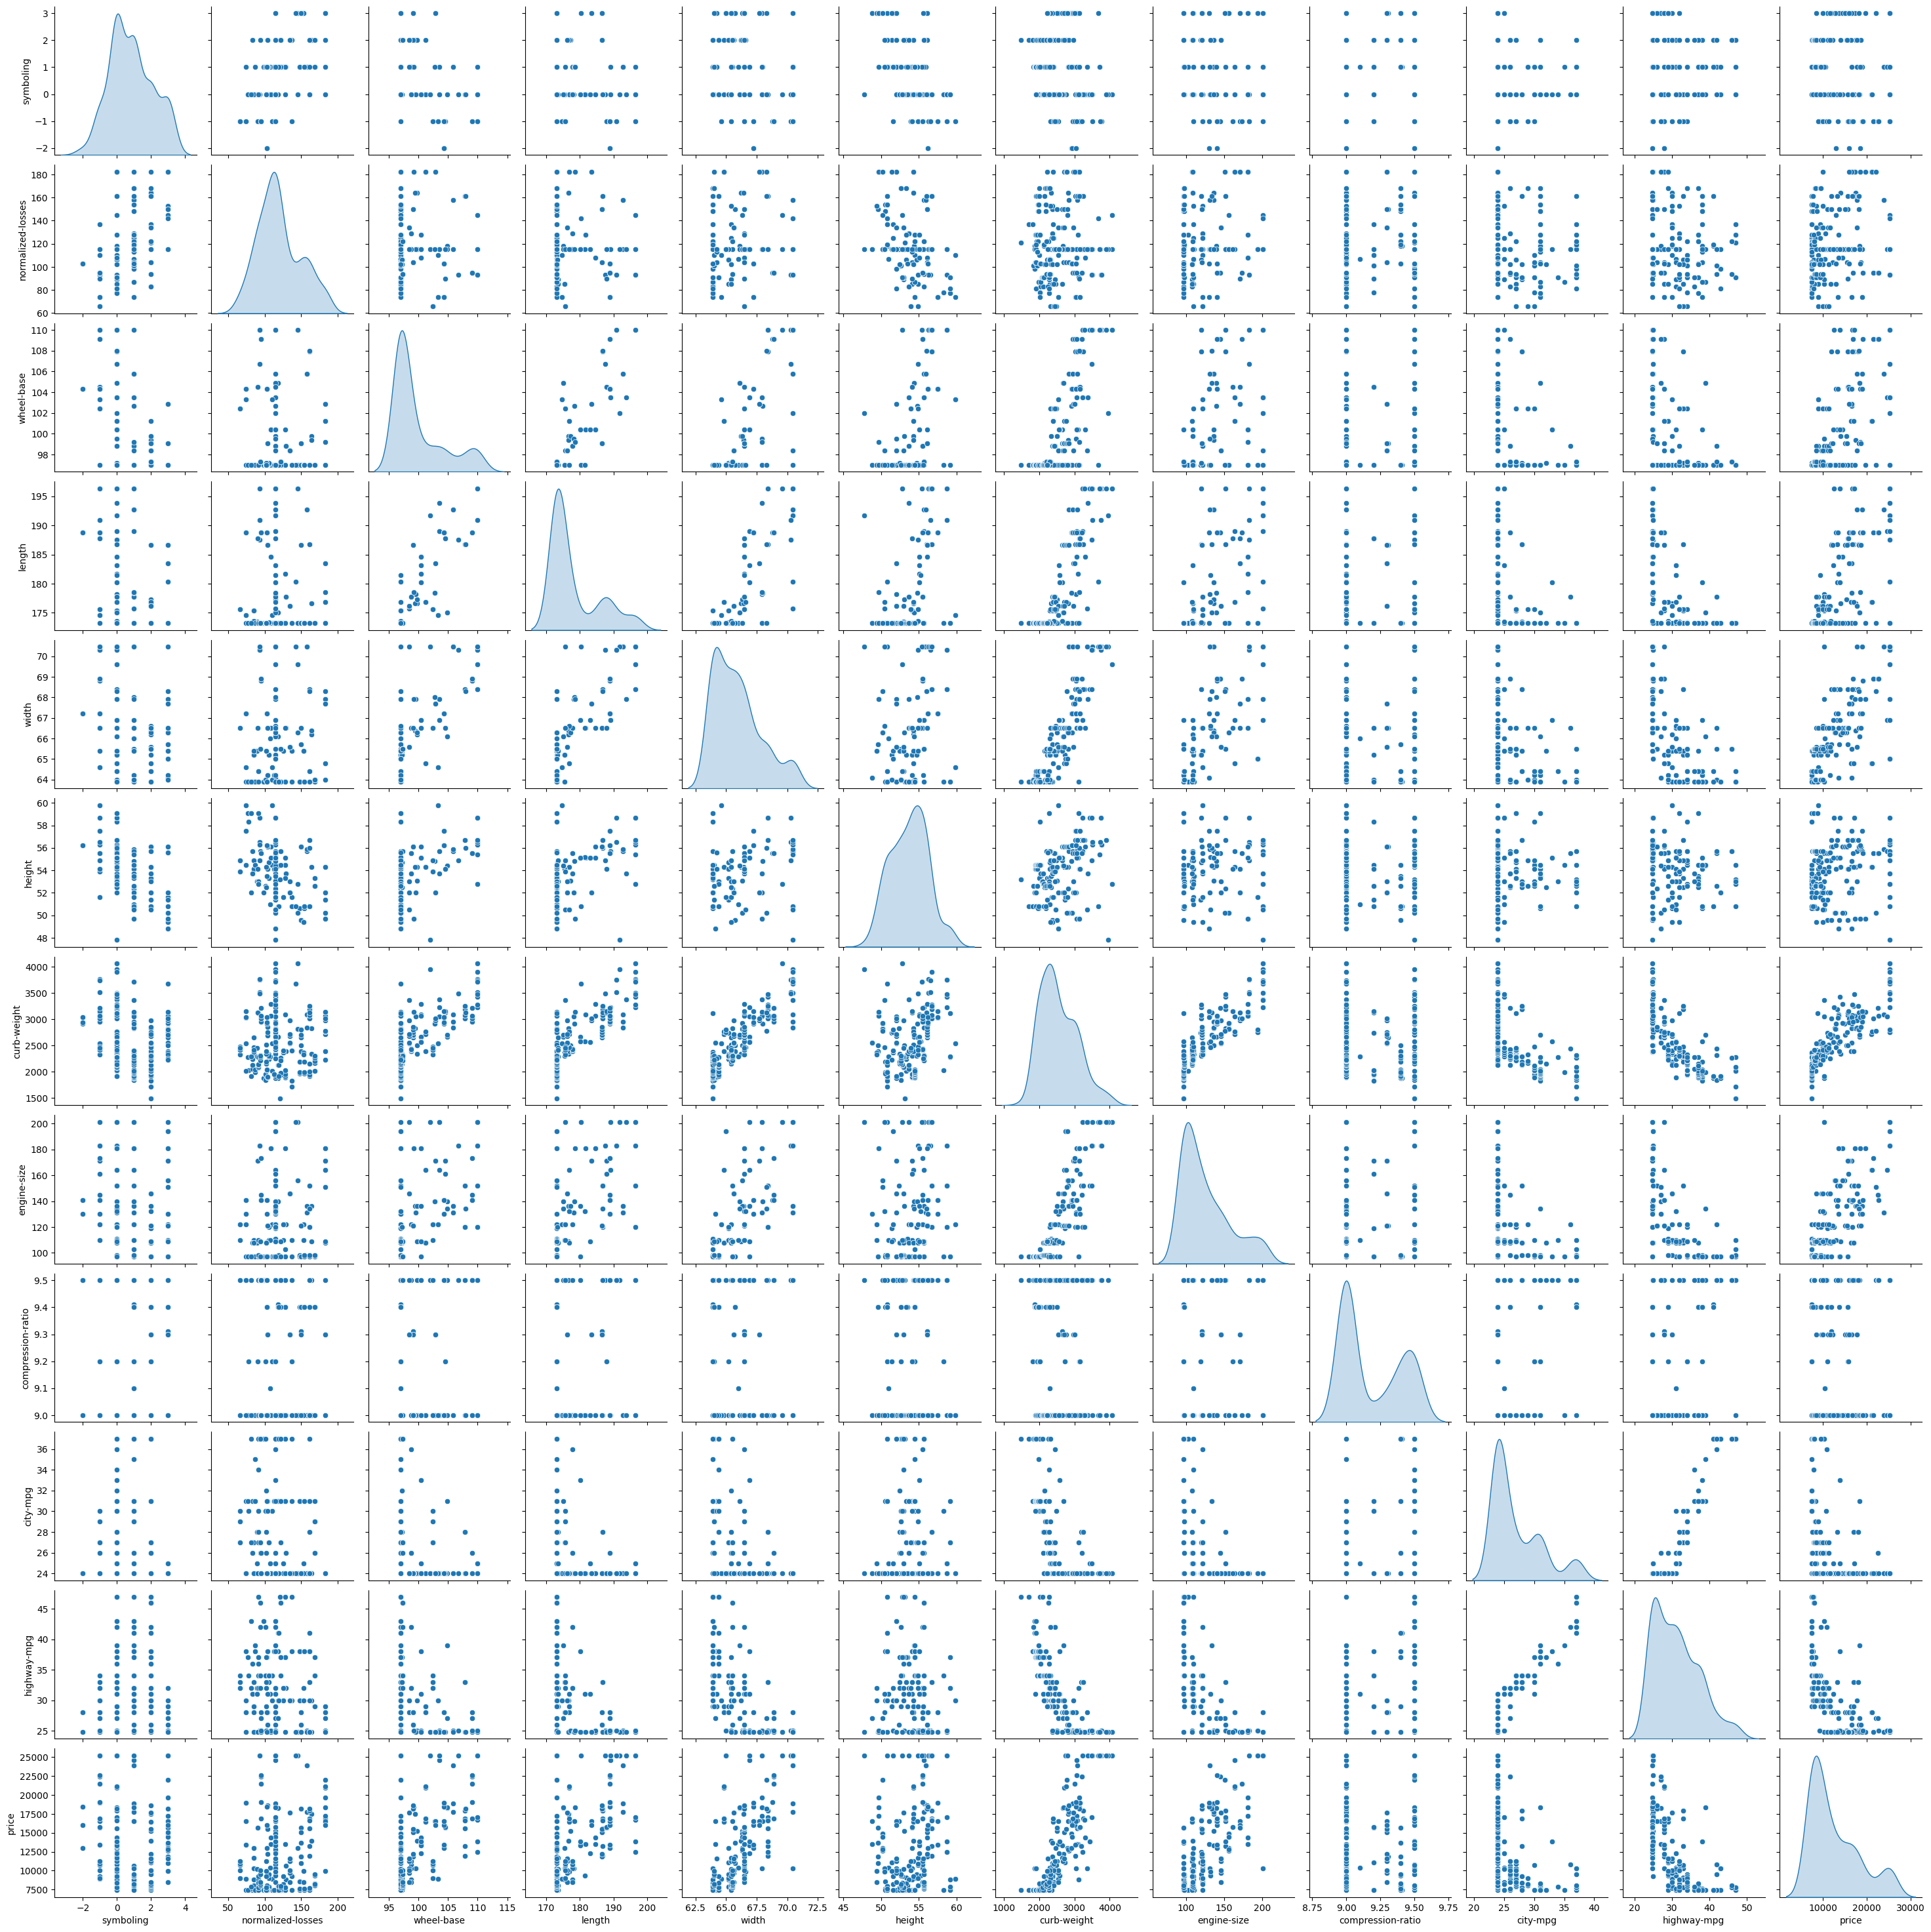

In [ ]:
sns.pairplot(data,diag_kind='kde')

Some of the kernal density estimate plots show more than 1 peak, indicatig the preasence of clusters in the data set.



<ipython-input-35-5e9f38c2f211>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr("pearson")
<ipython-input-35-5e9f38c2f211>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr,dtype =np.bool),cmap = sns.diverging_palette(220,10,as_cmap=True),square = True, ax=ax, annot=True)


<Axes: >

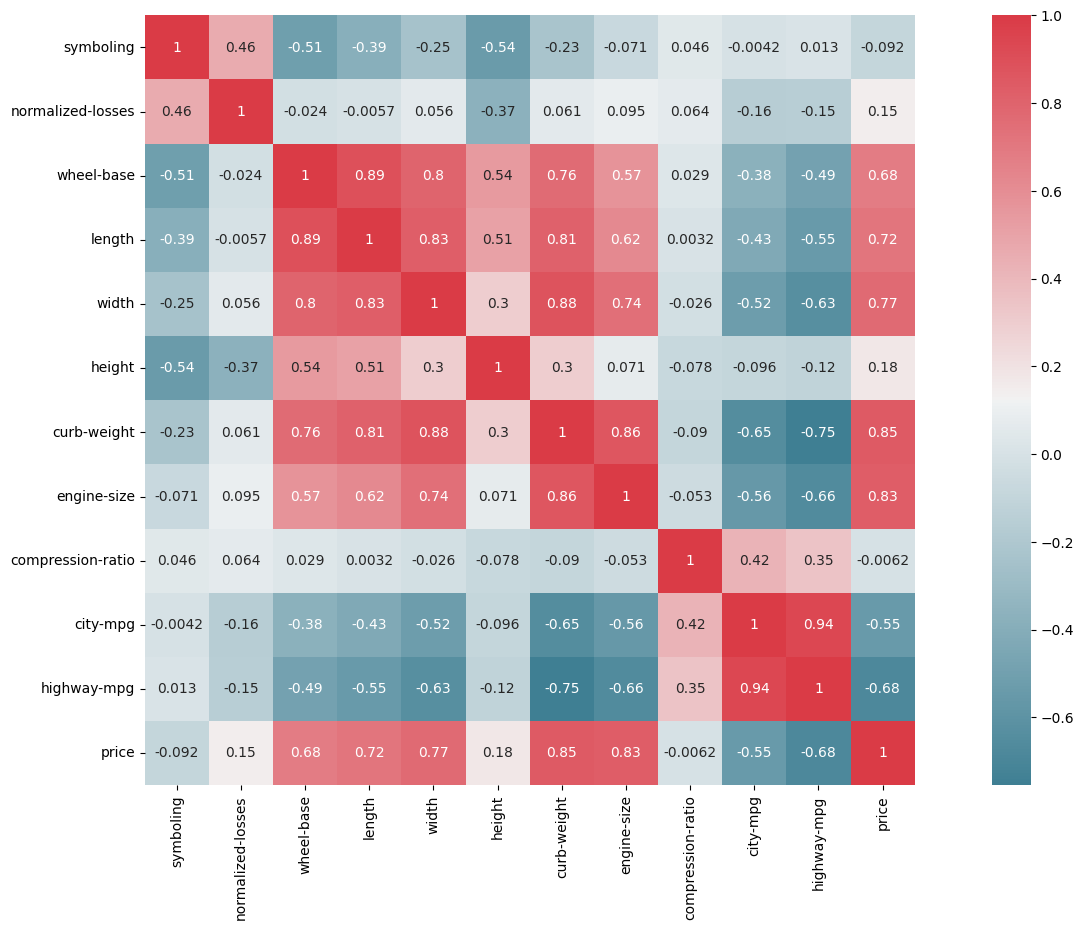

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
corr = data.corr("pearson")
sns.heatmap(corr,mask=np.zeros_like(corr,dtype =np.bool),cmap = sns.diverging_palette(220,10,as_cmap=True),square = True, ax=ax, annot=True)


The above corrplot shows preasence of multi colinearity in the data set.

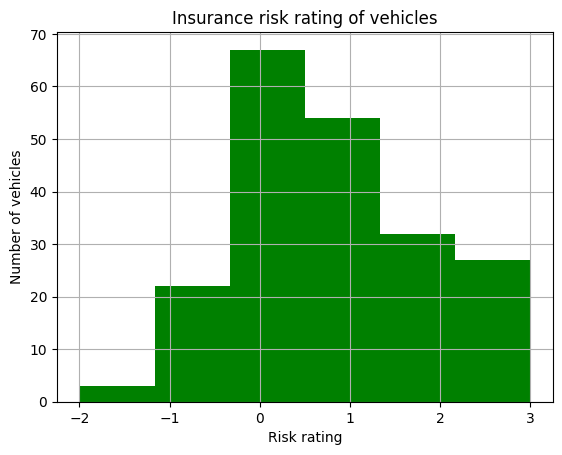

In [ ]:
data.symboling.hist(bins=6,color='green')
plt.title("Insurance risk rating of vehicles")
plt.xlabel ("Risk rating")
plt.ylabel ("Number of vehicles")
plt.show()

From the above histogram we can infer that a major part of the distribution lies between the range of 0.5 - 1.5. We can also infer that a large number of cars in this data set are safe.

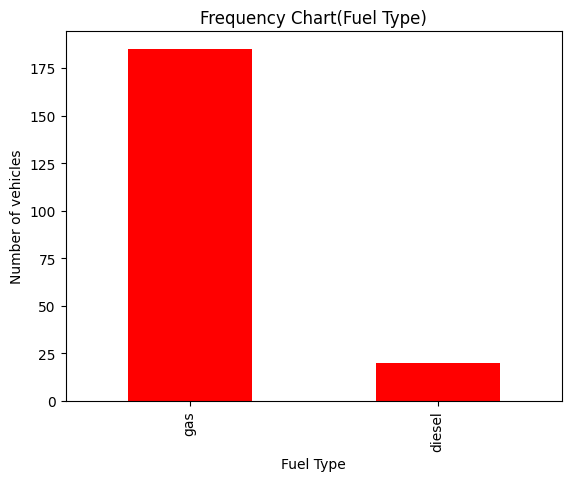

In [ ]:

data['fuel-type'].value_counts().plot(kind='bar', color = 'red')
plt.title("Frequency Chart(Fuel Type)")
plt.xlabel ("Fuel Type")
plt.ylabel ("Number of vehicles")
plt.show()

From the above barchart we can infer that majority of the cars recorded in this datset run on gas

***Data Preprocesing***

This dataset has 15 categorical variables and most of them have more than 2 categories. We can not run a regression model on text data. So, in order to deal with this challenge lets learn about label encoding. Label encoding is the preocess of converting categorical (text) data into numerical data.

Lets see how this is done.

In this example we will be working with the variable 'body-style' which has 5 categorie, namely -
1. convertible
2. Hatchback
3. Sedan
4. Wagon
5. hardtop

In [ ]:
# Data befor label encoding
data['body-style'].head(30)

0     convertible
1     convertible
2       hatchback
3           sedan
4           sedan
5           sedan
6           sedan
7           wagon
8           sedan
9       hatchback
10          sedan
11          sedan
12          sedan
13          sedan
14          sedan
15          sedan
16          sedan
17          sedan
18      hatchback
19      hatchback
20          sedan
21      hatchback
22      hatchback
23      hatchback
24      hatchback
25          sedan
26          sedan
27          sedan
28          wagon
29      hatchback
Name: body-style, dtype: object

In [ ]:
# Let's do Label Encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
labelen = LabelEncoder()
data['body-style'] = labelen.fit_transform(data['body-style'])

In [ ]:
# Data after Label Encoding
data['body-style'].head(20)

0     0
1     0
2     2
3     3
4     3
5     3
6     3
7     4
8     3
9     2
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    2
19    2
Name: body-style, dtype: int64

After running the label encoding code, we can see that the variable body-style has numerical values ranging from 0-4.

The problem with lable encoding is that it introduces an order between the categories, i.e. 0>1>2>3>4. This might confuse the model into thinkin that convertible is greater than hatchback.

So to deal with this problem, lets understand the concepts of one hot encoder.

In one hot encoding, categorical columns that have been label encoded are split into multiple colums and the values are replaced with 0's and 1's. 1's mark the preasence of a value and 0 its absence.


In [ ]:
# Let's do One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
onehoten = OneHotEncoder(handle_unknown='ignore')
onehoten_df = pd.DataFrame(onehoten.fit_transform(data[['body-style']]).toarray())

In [ ]:
# Data after One Hot Encoding
onehoten_df.head(15)

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0
